<a href="https://colab.research.google.com/github/franklinhamer2727/Examen-sustitutorio-de-macrodatos/blob/main/Entrenamiento_de_mi_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
Dados = pd.read_csv (r'/content/drive/MyDrive/dataset_project/cardio_train.csv', delimiter=';', encoding = "ISO-8859-1")         # As vezes encoding = "utf-8"
Dados

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Creating new Variables

Dados['bmi'] = (Dados['weight'] / (((Dados['height']/100)**2))).round(decimals=2)   # Body mass index
Dados['age_y'] = (Dados['age']/365).round(decimals=2)                               # Age in years

# Creating Flags for categories as 0-1

Dados['bmi_high'] = (Dados['bmi'] >= 30).astype(int)

In [4]:
del Dados['age']
del Dados['id']


In [5]:
Dados.head(10)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_y,bmi_high
0,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0
1,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,1
2,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0
3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,0
4,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0
5,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60.04,0
6,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60.58,1
7,2,178,95.0,130,90,3,3,0,0,1,1,29.98,61.87,0
8,1,158,71.0,110,70,1,1,0,0,1,0,28.44,48.41,0
9,1,164,68.0,110,60,1,1,0,0,0,0,25.28,54.34,0


<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
<ipython-input-6-f706edbfaa9d>:10: FutureWarning: 

The `ci` parameter is deprecated.

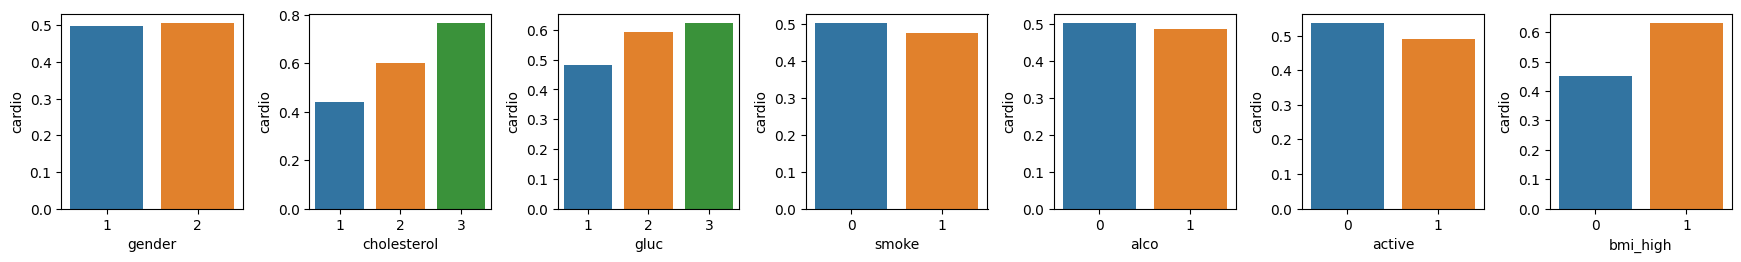

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [6]:
# Visualizing Discrete variables and its effects on cardio

Colunas = ('gender', 'cholesterol',	'gluc',	'smoke',	'alco',	'active',	'bmi_high')
fig=plt.figure(figsize=(20,20))
j = 1
for i in Colunas :
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=Dados,ci=None,ax=ax)
  fig.tight_layout()
plt.show()

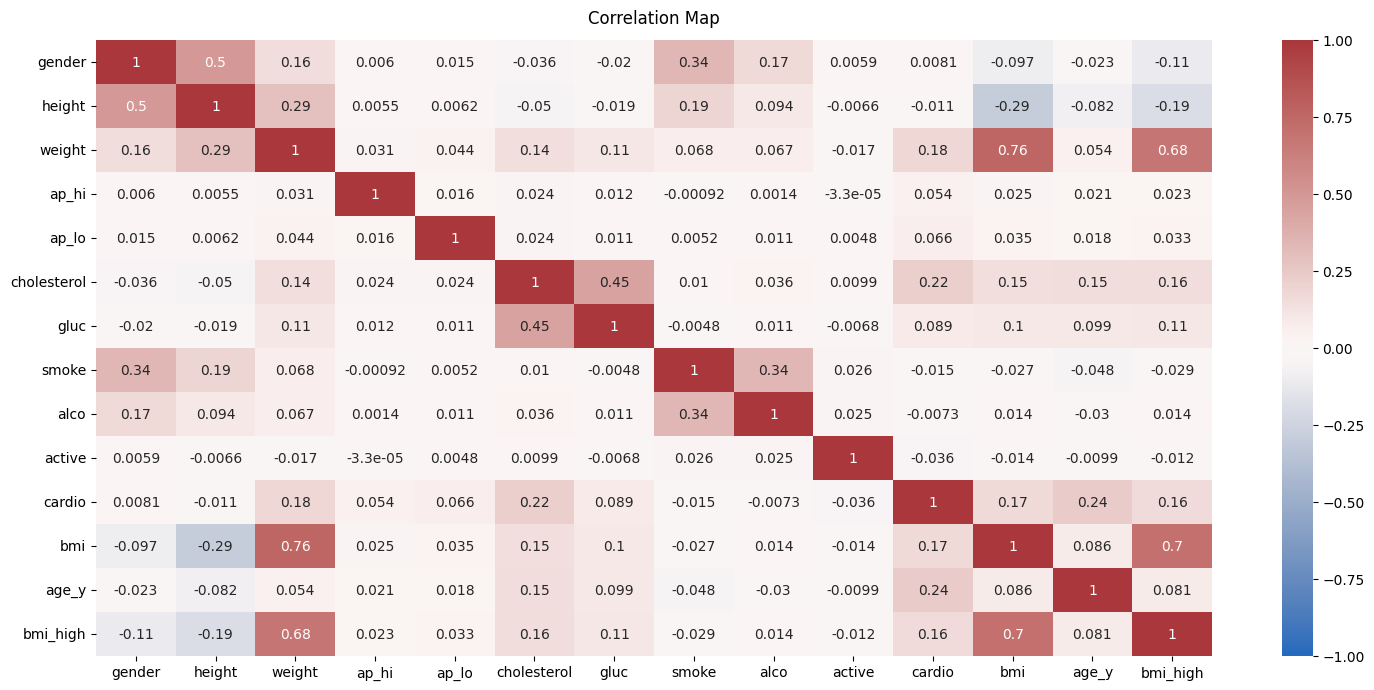

In [7]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
sns.heatmap(Dados.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

<Axes: xlabel='age_y', ylabel='weight'>

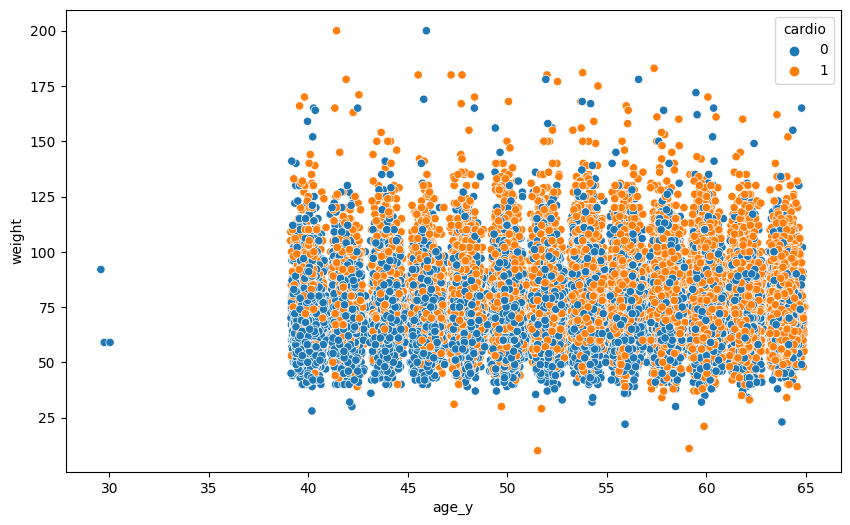

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_y', y='weight', data= Dados, hue='cardio')

<Axes: xlabel='weight', ylabel='Count'>

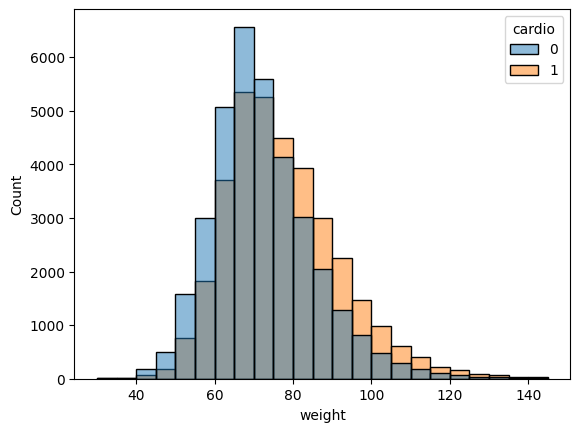

In [9]:
# Visualizing and understanding continuous variables relation with cardio variable

sns.histplot(Dados, x='weight', bins = range(30,150,5), hue='cardio')

<Axes: xlabel='age_y', ylabel='Count'>

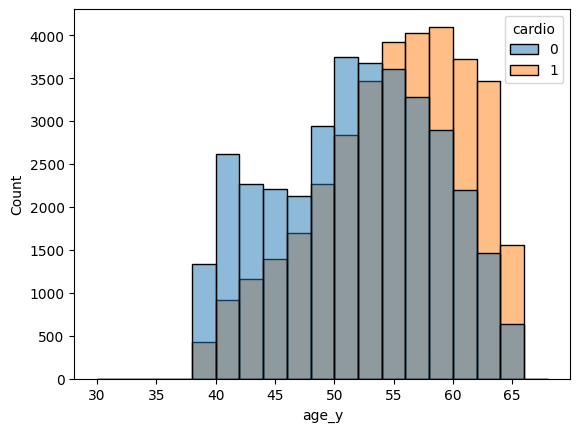

In [10]:
sns.histplot(Dados, x='age_y', bins = range(30,70,2), hue='cardio')

In [11]:
DadosX = Dados.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13]]        # independent variable

DadosY = Dados.iloc[:,10]                                    # dependent variable

In [12]:
# Splitting data

X_train, X_test, Y_train, Y_test = train_test_split(DadosX, DadosY,random_state=1, test_size=0.2)

In [13]:
X_train.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_y,bmi_high
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.00000,56000.000000,56000.000000,56000.000000,56000.000000
mean,1.350607,164.377411,74.269059,128.586571,96.592446,1.366786,1.225964,0.088643,0.05400,0.802982,27.575168,53.339259,0.265607
std,0.477164,8.212558,14.438785,146.476142,190.875418,0.679137,0.571761,0.284230,0.22602,0.397749,6.132967,6.765085,0.441660
min,1.000000,57.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.00000,0.000000,3.470000,29.580000,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,23.880000,48.390000,0.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,26.400000,53.990000,0.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,30.292500,58.430000,1.000000
max,2.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.00000,1.000000,298.670000,64.900000,1.000000


In [14]:
X_test.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_y,bmi_high
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,1.345429,164.286500,73.952216,129.740143,96.782286,1.367214,1.228429,0.086071,0.052857,0.806714,27.482054,53.339706,0.260786
std,0.475525,8.200284,14.220028,181.046019,178.544352,0.684712,0.574320,0.280480,0.223756,0.394889,5.921870,6.737720,0.439079
min,1.000000,55.000000,10.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.670000,39.130000,0.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.840000,48.407500,0.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,26.350000,53.960000,0.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.120000,58.420000,1.000000
max,2.000000,250.000000,181.000000,13010.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,267.770000,64.970000,1.000000


In [15]:
# Multi MLP Generator
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,20)
Layer2 = range(10,90,20)
LayersComb = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPClassifier(hidden_layer_sizes=(i,j),activation="relu" ,random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
    mlp.fit(X_train, Y_train)
    Y_pred_train = mlp.predict(X_train)
    training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test)
    acc_score = accuracy_score(Y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step

    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i, ' Layer2: ', j)
    print('Best Accuracy Score', score.round(4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)

Iteration 1, loss = 4.18153777
Iteration 2, loss = 0.66501723
Iteration 3, loss = 0.62603997
Iteration 4, loss = 0.60955092
Iteration 5, loss = 0.60245365
Iteration 6, loss = 0.59643295
Iteration 7, loss = 0.59514982
Iteration 8, loss = 0.59488959
Iteration 9, loss = 0.59564451
Iteration 10, loss = 0.58674030
Iteration 11, loss = 0.58403710
Iteration 12, loss = 0.58733686
Iteration 13, loss = 0.58802736
Iteration 14, loss = 0.58104481
Iteration 15, loss = 0.57922472
Iteration 16, loss = 0.58297911
Iteration 17, loss = 0.57844756
Iteration 18, loss = 0.57570097
Iteration 19, loss = 0.58185740
Iteration 20, loss = 0.58248921
Iteration 21, loss = 0.57782713
Iteration 22, loss = 0.57928585
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.
Step  1  of  16  Layer1:  10  Layer2:  10
Best Accuracy Score 0.7272  Best Layer1:  10  Best Layer2:  10  do Step: 1
Iteration 1, loss = 0.82243215
Iteration 2, loss = 0.60655124
Iteration 3, loss = 0.60157535
Iterat

<Axes: >

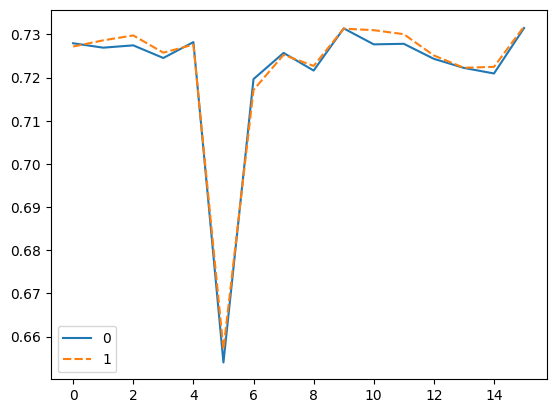

In [16]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [21]:
# Selected Model
mlp_selected = MLPClassifier(hidden_layer_sizes=(50,30),random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
mlp_selected.fit(X_train, Y_train)

Iteration 1, loss = 0.92600412
Iteration 2, loss = 0.59809119
Iteration 3, loss = 0.59640247
Iteration 4, loss = 0.59750966
Iteration 5, loss = 0.58404023
Iteration 6, loss = 0.59010657
Iteration 7, loss = 0.58695592
Iteration 8, loss = 0.58508063
Iteration 9, loss = 0.57924252
Iteration 10, loss = 0.57917393
Iteration 11, loss = 0.57906552
Iteration 12, loss = 0.57477767
Iteration 13, loss = 0.57792180
Iteration 14, loss = 0.57620852
Iteration 15, loss = 0.56829822
Iteration 16, loss = 0.56609290
Iteration 17, loss = 0.57264293
Iteration 18, loss = 0.56978702
Iteration 19, loss = 0.56305596
Iteration 20, loss = 0.57276039
Iteration 21, loss = 0.57318763
Iteration 22, loss = 0.56112218
Iteration 23, loss = 0.56796999
Iteration 24, loss = 0.56987701
Iteration 25, loss = 0.56820833
Iteration 26, loss = 0.56474402
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, n_iter_no_change=3,
              random_state=1, tol=0.001, verbose=True)

In [22]:
Y_pred_train = mlp_selected.predict(X_train)
training_accuracy.append(accuracy_score(Y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(X_test)
acc_score = accuracy_score(Y_test,Y_pred_test)
testing_accuracy.append(acc_score)

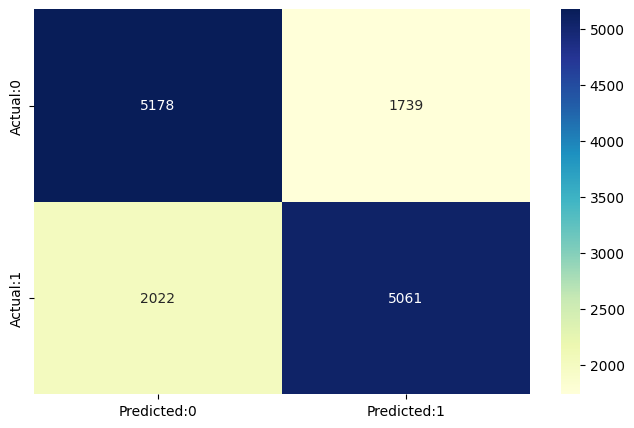

In [19]:
# Confusion Matrix for Selected Model
cm=confusion_matrix(Y_test,Y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [20]:
print(classification_report(Y_test,Y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6917
           1       0.74      0.71      0.73      7083

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [23]:
!pip install joblib


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib

# Assuming you have already defined and trained the 'mlp_selected' model

# Save the trained model to a file
model_filename = 'trained_model.joblib'
joblib.dump(mlp_selected, model_filename)


['trained_model.joblib']

In [25]:
# Load the model from the file
loaded_model = joblib.load(model_filename)

# Now you can use 'loaded_model' to make predictions
Y_pred_test_loaded = loaded_model.predict(X_test)
